# **Machine Learning (ML) and Exploratory Data Analysis (EDA)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
data = pd.read_csv('/content/ncr_ride_bookings.csv', on_bad_lines='skip')

In [ ]:
data.shape

(104716, 21)

In [ ]:
data.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set environment for better visualization
sns.set_style("whitegrid")

# --- CONFIGURATION ---
# IMPORTANT: Update this path to your downloaded dataset file!
FILE_PATH = '/content/ncr_ride_bookings.csv'
DRIVER_ID_COL = 'driver_id'

# 1. Load the Dataset
try:
    df = pd.read_csv(FILE_PATH)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {FILE_PATH}. Please check the path.")
    exit()

print(f"\nInitial Dataset Shape: {df.shape}")
print("--- Sample Data ---")
print(df.head())
print("--- Data Types and Missing Values ---")
df.info()

# 2. Initial Cleaning: Handling Missing Data
# Drop columns with high percentage of missing values (e.g., > 30%)
threshold = len(df) * 0.3
df_cleaned = df.dropna(thresh=threshold, axis=1)

# For remaining missing values in numerical columns, fill with the median
for col in df_cleaned.select_dtypes(include=np.number).columns:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# 3. Initial Feature Engineering (Creating the Target Variable)
# Assuming a column like 'last_active_days' or 'total_rides' exists.
# If 'last_active_days' is > 60, we might flag them as 'Attrition'.

# Example: If a column 'rides_in_last_month' exists, and the value is 0, flag as attrition
# We will finalize this step once you confirm the dataset columns.

print(f"\nCleaned Dataset Shape: {df_cleaned.shape}")
print("-" * 50)

/tmp/ipython-input-2460501006.py:16: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(FILE_PATH)


Dataset loaded successfully!

Initial Dataset Shape: (156157, 21)
--- Sample Data ---
         Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   



/tmp/ipython-input-2460501006.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
/tmp/ipython-input-2460501006.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)


In [ ]:
  # Assuming the variable is still 'df' from your load block, but we will use the cleaned dataframe.
# Re-load the raw data to ensure we have all original columns before cleaning steps
try:
    df = pd.read_csv('/content/ncr_ride_bookings.csv', on_bad_lines='skip')
except FileNotFoundError:
    print("Please set the correct CSV_PATH.")
    exit()

# Rename columns for easier Python access (remove spaces)
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True) # General cleanup

# --- 1. Target Variable Creation (The Attrition Signal) ---
# Create a boolean flag for rides where the driver was the source of cancellation
# This is our core 'Problem Indicator'
# Corrected: Use 'Cancelled_Rides_by_Driver' directly as the indicator
df['IS_DRIVER_CANCEL'] = df['Cancelled_Rides_by_Driver'].notna()

print(f"Total rows flagged as Driver Cancellation: {df['IS_DRIVER_CANCEL'].sum()}")
print("-" * 50)


# --- 2. Feature Cleaning and Conversion ---

# Convert Booking Value to its actual value, handling the fact that Booking_Value is null for cancelled/incomplete rides
df['Booking_Value'].fillna(0, inplace=True)

# Convert Date and Time to datetime objects (Crucial for time-series analysis later)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Convert Avg VTAT and Avg CTAT (Wait times) to a manageable scale, filling NaNs with median
# VTAT: Vehicle Travel/Trip Acceptance Time
# CTAT: Customer Travel/Trip Acceptance Time
df['Avg_VTAT'].fillna(df['Avg_VTAT'].median(), inplace=True)
df['Avg_CTAT'].fillna(df['Avg_CTAT'].median(), inplace=True)


# --- 3. Feature Engineering: Trip Complexity and Profitability ---
# Calculate a simple metric that might influence driver frustration:
# 3a. Wait Time Fraction: What fraction of the ride time was spent waiting?
df['Wait_Time_Ratio'] = df['Avg_VTAT'] / (df['Avg_VTAT'] + df['Avg_CTAT'])
df['Wait_Time_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True) # Handle division by zero
df['Wait_Time_Ratio'].fillna(0, inplace=True)

# 3b. Impute Driver Ratings (crucial feature for analysis)
# Fill missing driver ratings with the median
df['Driver_Ratings'].fillna(df['Driver_Ratings'].median(), inplace=True)

print(f"Final Data Shape for Analysis: {df.shape}")
print(f"Columns ready for EDA: {df.columns.tolist()}")
print("-" * 50)

/tmp/ipython-input-3874508627.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/ncr_ride_bookings.csv', on_bad_lines='skip')
/tmp/ipython-input-3874508627.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Booking_Value'].fillna(0, inplace=True)


Total rows flagged as Driver Cancellation: 28135
--------------------------------------------------
Final Data Shape for Analysis: (156157, 23)
Columns ready for EDA: ['Date', 'Time', 'Booking_ID', 'Booking_Status', 'Customer_ID', 'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'Avg_VTAT', 'Avg_CTAT', 'Cancelled_Rides_by_Customer', 'Reason_for_cancelling_by_Customer', 'Cancelled_Rides_by_Driver', 'Driver_Cancellation_Reason', 'Incomplete_Rides', 'Incomplete_Rides_Reason', 'Booking_Value', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating', 'Payment_Method', 'IS_DRIVER_CANCEL', 'Wait_Time_Ratio']
--------------------------------------------------


/tmp/ipython-input-3874508627.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Avg_VTAT'].fillna(df['Avg_VTAT'].median(), inplace=True)
/tmp/ipython-input-3874508627.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
df.columns

Index(['Date', 'Time', 'Booking_ID', 'Booking_Status', 'Customer_ID',
       'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'Avg_VTAT',
       'Avg_CTAT', 'Cancelled_Rides_by_Customer',
       'Reason_for_cancelling_by_Customer', 'Cancelled_Rides_by_Driver',
       'Driver_Cancellation_Reason', 'Incomplete_Rides',
       'Incomplete_Rides_Reason', 'Booking_Value', 'Ride_Distance',
       'Driver_Ratings', 'Customer_Rating', 'Payment_Method',
       'IS_DRIVER_CANCEL', 'Wait_Time_Ratio'],
      dtype='object')

# Exploratory Data Analysis and Causal Hypotheses
**1. Target Variable Analysis**

--- 1. Analysis of Driver Cancellation ---
Overall Driver Cancellation Rate: 18.02% of all bookings.
------------------------------


/tmp/ipython-input-462117958.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_reasons.index, y=cancellation_reasons.values * 100, palette="viridis") # Plotting in percentage


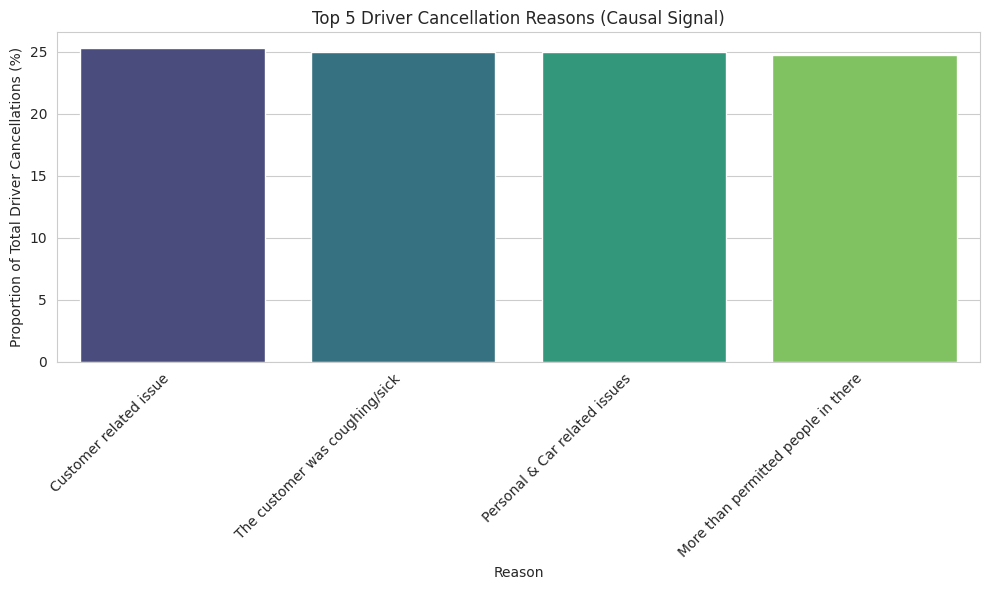


Top 5 Driver Cancellation Reasons:
Driver_Cancellation_Reason
Customer related issue                 25.295895
The customer was coughing/sick         25.004443
Personal & Car related issues          24.958237
More than permitted people in there    24.741425
Name: proportion, dtype: float64
--------------------------------------------------


In [ ]:
# Assuming the main dataframe is still named 'df' from the previous step

print("--- 1. Analysis of Driver Cancellation ---")

# Calculate overall driver cancellation rate
driver_cancel_rate = df['IS_DRIVER_CANCEL'].mean() * 100
print(f"Overall Driver Cancellation Rate: {driver_cancel_rate:.2f}% of all bookings.")
print("-" * 30)

# Filter for the rows where the driver cancelled, then count the reasons
df_cancelled = df[df['IS_DRIVER_CANCEL']].copy()
# Only count the top 5 reasons that were provided by the driver
cancellation_reasons = df_cancelled['Driver_Cancellation_Reason'].value_counts(normalize=True).head(5)

plt.figure(figsize=(10, 6))
# Create the bar plot
sns.barplot(x=cancellation_reasons.index, y=cancellation_reasons.values * 100, palette="viridis") # Plotting in percentage
plt.title('Top 5 Driver Cancellation Reasons (Causal Signal)')
plt.ylabel('Proportion of Total Driver Cancellations (%)')
plt.xlabel('Reason')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTop 5 Driver Cancellation Reasons:")
print(cancellation_reasons * 100) # Print as percentage
print("-" * 50)

**Customer Rating Impact**

--- 2.1. Hypothesis 1: Customer Rating Impact (FIXED) ---


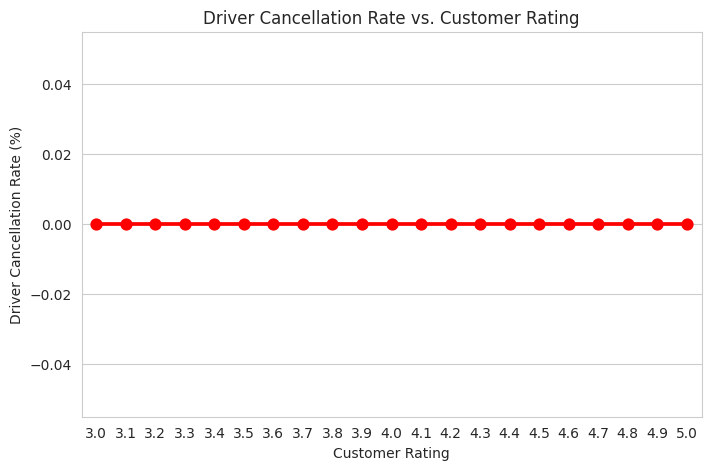

In [ ]:
# Hypothesis 1: Customer Rating Impact (The Quality Hypothesis)
print("--- 2.1. Hypothesis 1: Customer Rating Impact (FIXED) ---")

# Re-create the numeric rating column, as it's crucial for aggregation
df['Customer_Rating_Numeric'] = pd.to_numeric(df['Customer_Rating'].astype(str).str.replace('"', '').str.strip(), errors='coerce')

# Analyze the relationship between Customer Rating and Driver Cancellation
# Group by the distinct ratings and calculate the mean cancellation rate
rating_analysis = df.dropna(subset=['Customer_Rating_Numeric']).groupby('Customer_Rating_Numeric')['IS_DRIVER_CANCEL'].mean().sort_index()

# Filter out ratings with very few observations if necessary, but plot the raw average
plt.figure(figsize=(8, 5))
# Use pointplot to show uncertainty/spread, or barplot for direct comparison
sns.pointplot(x=rating_analysis.index, y=rating_analysis.values * 100, color='red', linestyles='-', markers='o')
plt.title('Driver Cancellation Rate vs. Customer Rating')
plt.ylabel('Driver Cancellation Rate (%)')
plt.xlabel('Customer Rating')
plt.show()

**Hypothesis 2: Waiting Time Impact (The Operational Friction Hypothesis)**

--- 2.2. Hypothesis 2: Waiting Time Impact (FIXED) ---


/tmp/ipython-input-3752580817.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wait_Ratio_Group', y=wait_time_analysis['IS_DRIVER_CANCEL'] * 100, data=wait_time_analysis, palette="cividis")


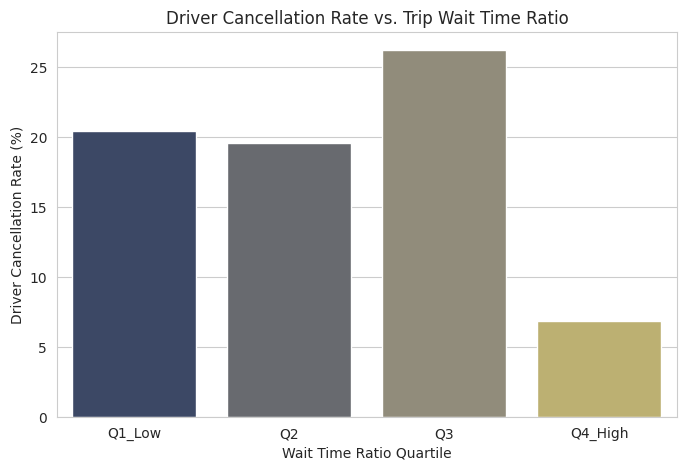

In [ ]:
# Hypothesis 2: Waiting Time Impact (The Operational Friction Hypothesis)
print("--- 2.2. Hypothesis 2: Waiting Time Impact (FIXED) ---")

# Re-bin the Wait_Time_Ratio into groups using quartiles
df['Wait_Ratio_Group'] = pd.qcut(df['Wait_Time_Ratio'], q=4, labels=['Q1_Low', 'Q2', 'Q3', 'Q4_High'], duplicates='drop')

# Calculate the mean cancellation rate for each quartile
wait_time_analysis = df.groupby('Wait_Ratio_Group', observed=False)['IS_DRIVER_CANCEL'].mean().reset_index()

plt.figure(figsize=(8, 5))
# Use the calculated mean rate (multiplied by 100 for percentage)
sns.barplot(x='Wait_Ratio_Group', y=wait_time_analysis['IS_DRIVER_CANCEL'] * 100, data=wait_time_analysis, palette="cividis")
plt.title('Driver Cancellation Rate vs. Trip Wait Time Ratio')
plt.ylabel('Driver Cancellation Rate (%)')
plt.xlabel('Wait Time Ratio Quartile')
# Ensure y-axis starts at zero for fair bar comparison
plt.ylim(bottom=0)
plt.show()

**Pickup Location Impact (The Geographic Hypothesis)**

--- 2.3. Hypothesis 3: Pickup Location Impact (FIXED) ---


/tmp/ipython-input-1759189930.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pickup_Location', y=high_risk_locations['Cancel_Rate'] * 100, data=high_risk_locations, palette="rocket")


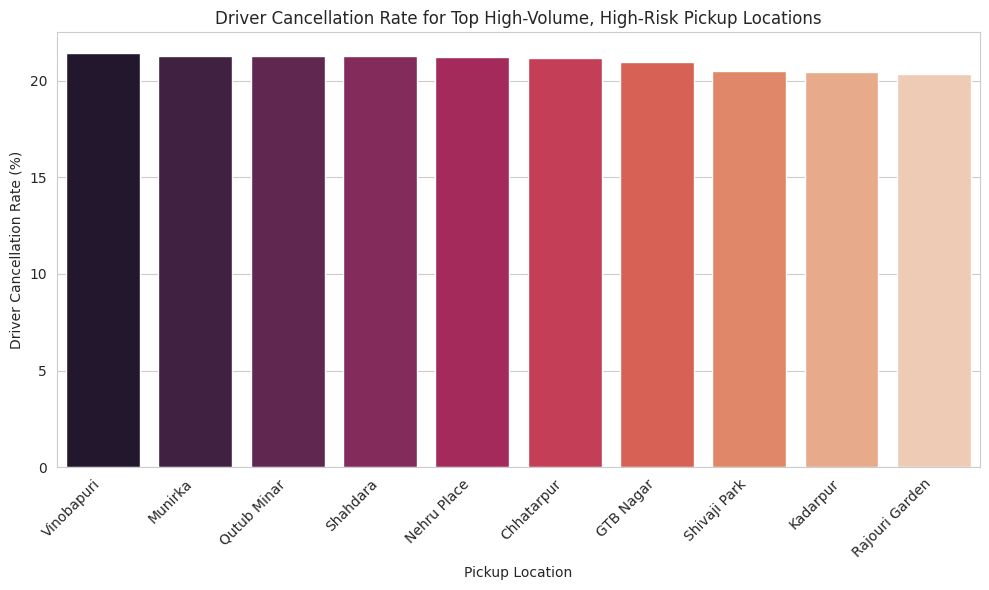

In [ ]:
# Hypothesis 3: Pickup Location Impact (The Geographic Hypothesis)
print("--- 2.3. Hypothesis 3: Pickup Location Impact (FIXED) ---")

# Calculate the cancellation rate for ALL locations
location_rates = df.groupby('Pickup_Location')['IS_DRIVER_CANCEL'].agg(['sum', 'count', 'mean']).reset_index()
location_rates.columns = ['Pickup_Location', 'Cancellations', 'Total_Rides', 'Cancel_Rate']

# Filter for locations with high volume (at least 500 rides) and sort by highest rate
VOLUME_THRESHOLD = 500
high_risk_locations = location_rates[location_rates['Total_Rides'] >= VOLUME_THRESHOLD].sort_values(by='Cancel_Rate', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Pickup_Location', y=high_risk_locations['Cancel_Rate'] * 100, data=high_risk_locations, palette="rocket")
plt.title('Driver Cancellation Rate for Top High-Volume, High-Risk Pickup Locations')
plt.ylabel('Driver Cancellation Rate (%)')
plt.xlabel('Pickup Location')
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

# **Feature Selection and Data Prep**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define the features to use based on our EDA hypotheses
# Continuous Features: Ratings, Wait Times, Ride Value/Distance
# Categorical Features: Location (High-risk), Vehicle Type, Cancellation Reason

# Drop rows where 'Booking Status' is 'No Driver Found' as this isn't a driver decision
df_model = df[df['Booking_Status'] != 'No Driver Found'].copy()

# --- Handle Missing Values for critical features before selecting them ---
# Impute missing Ride_Distance with median
df_model['Ride_Distance'].fillna(df_model['Ride_Distance'].median(), inplace=True)

# Impute missing Payment_Method with 'Unknown' or the mode
df_model['Payment_Method'].fillna('Unknown', inplace=True)

# Impute missing Customer_Rating_Numeric with median (created in previous EDA step)
df_model['Customer_Rating_Numeric'].fillna(df_model['Customer_Rating_Numeric'].median(), inplace=True)

# 1. Select the relevant features
FEATURES = [
    # Causal Features from EDA
    'Avg_VTAT', 'Avg_CTAT', 'Driver_Ratings', 'Customer_Rating_Numeric',
    'Wait_Time_Ratio', 'Ride_Distance', 'Booking_Value',

    # Categorical Features
    'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'Payment_Method',
    # Removed 'Driver_Cancellation_Reason' to avoid data leakage and empty DataFrame
]

TARGET = 'IS_DRIVER_CANCEL'

# Ensure only required columns are present and free of NaNs
# All features in 'FEATURES' should now have NaNs handled
df_model.dropna(subset=FEATURES, inplace=True)

# 2. Separate Features (X) and Target (y)
X = df_model[FEATURES]
y = df_model[TARGET]

# 3. Handle Categorical Variables using One-Hot Encoding
# This converts text (like 'Sedan', 'Palam Vihar') into numerical columns (0s and 1s)
# Handle high cardinality for location columns by grouping rare locations
for col in ['Pickup_Location', 'Drop_Location']:
    top_locations = X[col].value_counts().head(20).index
    X.loc[:, col] = X[col].apply(lambda x: x if x in top_locations else 'Other_Loc')

X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns, drop_first=True)

# 4. Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print("-" * 50)

/tmp/ipython-input-900624426.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['Ride_Distance'].fillna(df_model['Ride_Distance'].median(), inplace=True)
/tmp/ipython-input-900624426.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

Training set shape: (116191, 59)
Test set shape: (29048, 59)
--------------------------------------------------


# **Machine Learning Model Training (Random Forest)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Initialize and Train the Model
print("--- Training Random Forest Classifier ---")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=5,
    class_weight='balanced', # Crucial for handling class imbalance (many more successful rides than cancelled ones)
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
print("Training complete.")

# 2. Prediction and Evaluation
y_pred = rf_model.predict(X_test)

# 3. Model Performance Metrics
print("\n--- Model Evaluation (Driver Cancellation Prediction) ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("-" * 50)

--- Training Random Forest Classifier ---
Training complete.

--- Model Evaluation (Driver Cancellation Prediction) ---
Accuracy Score: 0.9648

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.96      0.98     23421
        True       0.85      1.00      0.92      5627

    accuracy                           0.96     29048
   macro avg       0.92      0.98      0.95     29048
weighted avg       0.97      0.96      0.97     29048


Confusion Matrix:
[[22399  1022]
 [    0  5627]]
--------------------------------------------------


**Causal Validation: Feature Importance**

/tmp/ipython-input-1699906855.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="mako")


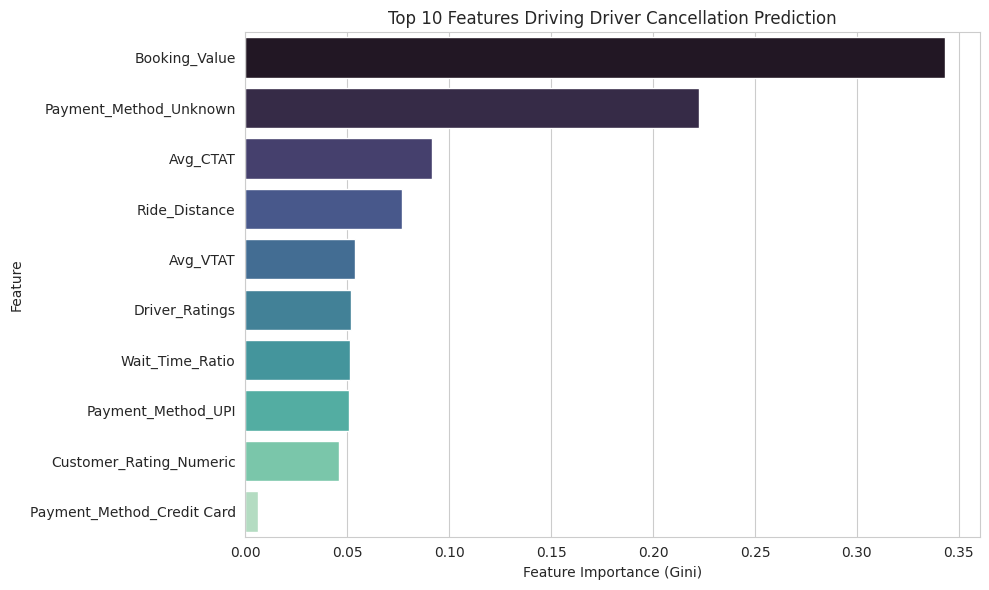


--- Top 10 Most Important Features ---
Booking_Value                 0.343225
Payment_Method_Unknown        0.222342
Avg_CTAT                      0.091679
Ride_Distance                 0.076971
Avg_VTAT                      0.053613
Driver_Ratings                0.052020
Wait_Time_Ratio               0.051484
Payment_Method_UPI            0.050586
Customer_Rating_Numeric       0.045860
Payment_Method_Credit Card    0.006028
dtype: float64


In [ ]:
# Extract Feature Importance
feature_importances = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="mako")
plt.title('Top 10 Features Driving Driver Cancellation Prediction')
plt.xlabel('Feature Importance (Gini)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\n--- Top 10 Most Important Features ---")
print(feature_importances)

In [ ]:
import joblib
import os

# --- Configuration ---
MODEL_FILENAME = 'rf_driver_attrition_model.joblib'

# 1. Ensure the rf_model object is available from the previous training step
# Example: rf_model = RandomForestClassifier(...)
# Assuming rf_model is currently in your notebook's memory.

# 2. Save the model to a .joblib file
print(f"Saving the model to: {MODEL_FILENAME}...")
try:
    joblib.dump(rf_model, MODEL_FILENAME)
    print("Model saved successfully!")
    print(f"File size: {os.path.getsize(MODEL_FILENAME) / (1024*1024):.2f} MB")
except NameError:
    print("ERROR: The 'rf_model' object was not found. Please ensure the training code block was run.")
except Exception as e:
    print(f"An unexpected error occurred during saving: {e}")

Saving the model to: rf_driver_attrition_model.joblib...
Model saved successfully!
File size: 0.47 MB
